In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

In [22]:
meta_data = pd.read_csv('Data/meta_data.csv')

In [23]:
meta_data.describe()

,ID,Lifetime
count,1027.000000,1027.000000
mean,513.000000,531.314508
std,296.613666,92.324199
min,0.000000,401.000000
25%,256.500000,453.000000
50%,513.000000,519.000000
75%,769.500000,592.500000
max,1026.000000,761.000000


In [24]:
data = []

In [25]:
def get_data(N):
    data = []
    
    path = f"{N}.npz"
    path = os.path.join("Data/npz/", path)
    
    bat_files = np.load(path)
    bat_files.files
    
    for bat_file in bat_files['arr_0']:
        data.append(bat_file)
    
    return data

In [26]:
data = get_data(N = 256)

In [27]:
# Time-stamps.

t = []
for row in data:
    t.append(row[0])

In [28]:
# Current Data.

C = []
for row in data:
    C.append(row[1])

In [29]:
# Voltage Data.

V = []
for row in data:
    V.append(row[2])

In [30]:
# Temperature Data.

T = []
for row in data:
    T.append(row[3])

In [31]:
X = np.atleast_2d(C[:100]).T

In [32]:
y = V[:100]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(C, V, test_size = 0.2)

In [34]:
# Create a Gaussian Process Regressor with a Wiener Velocity kernel
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)) \
        + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-10, 1e+1))

In [35]:
# Define the Gaussian process regressor with alpha=0 (no regularization)
gp = GaussianProcessRegressor(kernel=kernel)

In [36]:
# Fit the Gaussian process to the data
gp.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.12756542 -0.1388571   0.55352102 ...  0.12756542  0.13138018
  0.22140841].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [37]:
# Estimate beta parameter
beta = 1 / (2 * gp.alpha_)

AttributeError: 'GaussianProcessRegressor' object has no attribute 'alpha_'

In [38]:
beta

array([ 0.01339967,  0.01428299, -0.00709419, -0.01215577,  0.00654267,
        0.01504623, -0.02234617, -0.28125617,  0.02436221,  0.01159993,
        0.00271801, -0.0066093 , -0.02145978, -0.39138664, -0.39138664,
       -0.39138664,  0.01634574,  0.00187345,  0.01234098,  0.00171547,
        0.03619469,  0.00181515, -0.04259849,  0.03619469,  0.08857824,
        0.00704095, -0.00652614, -0.00728017, -0.01134939, -0.01403513,
       -0.01821085, -0.01821085, -0.04757944, -0.00277071,  0.06945595,
        0.02002713,  0.03154303, -0.00892285, -0.00892285, -0.01334153,
       -0.01785134, -0.05216602, -0.05216602, -0.05216602, -1.60259433,
       -0.01290132,  0.05903905, -0.02159554, -0.00671577, -0.02661807,
       -0.00766237, -0.00859118, -0.02661807, -0.01513332, -0.01513332,
       -0.01513332,  1.00899879, -0.01787137,  0.0049861 , -0.02661807,
        0.00298079, -0.00420386,  0.00409676, -0.00396565,  0.00425047,
        0.09220488,  1.00899879, -0.00452662,  0.09220488,  0.05

In [39]:
# Make predictions on the test data
y_pred, sigma = gp.predict(X_test, return_std = True)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.83115892  0.11444266  0.12756542 ...  0.11818112 -0.02258335
 -0.07499809].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

NameError: name 'y_pred' is not defined

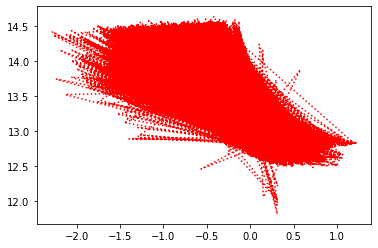

In [20]:
# Plot the results
plt.figure()
plt.plot(X_test, y_test, 'r:', label=u'$f(x)$')
plt.plot(X_test, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([X_test, X_test[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-1, 20)
plt.legend(loc='upper left')
plt.show()